In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# reading train and test data and shuffling train data 
TRAIN = pd.read_csv('./train.csv').to_numpy(dtype='int64')
TEST = pd.read_csv('./test.csv').to_numpy(dtype='int64')
np.random.shuffle(TRAIN)

# these are train/test x y but those are dumb names
imgs, labels = TRAIN[:, 1:], TRAIN[:, 0]
imgs_test, labels_test = TEST[:, 1:], TEST[:, 0]

label: 2


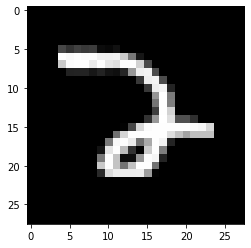

In [17]:
# read the nth image from either the test or training set
# if your using this to view/graph the image pass view=True
def read_nth_img(data, n, view=False):

    # read training data into image arrays
    img = data[n:n+1, 1:].reshape(28, 28) if view else np.transpose(data[n:n+1, 1:])
    label = data[n, 0]
    
    return [img, label]

# plot numpy array *img* as grayscale image on matplotlib graph
def graph_img(img):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.show()

# example call to view a training data image
img, label = read_nth_img(TRAIN, 217, view=True)
print(f'label: {label}')
graph_img(img)


In [15]:
# stochastic gradient descent training for nn
# name parameter saves nn as a folder ./name
def train_nn(name):

    # create a 3 hidden layer nn
    # input layer takes 784 row 1 col array of nodes
    # nodes have a brightness value 0...255 of its brightness in the image
    # 2 hidden layers using relu activation and output layer using softmax to compress values between 0...1
    nn = tf.keras.Sequential(
        [
            tf.keras.layers.Input(shape=(784,), name='a0'),
            tf.keras.layers.Dense(units=128, activation='relu', name='a1'),
            tf.keras.layers.Dense(units=128, activation='relu', name='a2'),
            tf.keras.layers.Dense(units=10, activation='softmax', name='a3'),
        ]
    )

    # fit the nn to the training data
    nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    nn.fit(imgs, labels, epochs=5)

    # test the nn on the test data and see its performance loss and acc
    loss, acc = nn.evaluate(imgs_test, labels_test)
    print(f'test_data:\nloss: {loss}\nacc: {acc}\n')
    nn.save(name)

train_nn('handwritten_ml')

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4649 - accuracy: 0.8814
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2891 - accuracy: 0.9327
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1822 - accuracy: 0.9496
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1580 - accuracy: 0.9558
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.2017 - accuracy: 0.9515
test_data:
loss: 0.20169603824615479
acc: 0.9514999985694885

INFO:tensorflow:Assets written to: handwritten_ml\assets
